<a href="https://colab.research.google.com/github/LatiefDataVisionary/scikit-learn-with-indonesia-belajar/blob/main/SKLearn_07_Regression_dengan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SKLearn 07: Regression dengan KNN | K-Nearest Neighbours | Belajar Machine Learning Dasar**


### **Sample Dataset**

In [1]:
import pandas as pd

sensus = {'tinggi': [156, 170, 183, 191, 158, 170, 181, 175, 164],
          'jk': ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita'],
          'berat': [64, 86, 84, 80, 49, 59, 67, 54, 67]}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,jk,berat
0,156,pria,64
1,170,pria,86
2,183,pria,84
3,191,pria,80
4,158,wanita,49
5,170,wanita,59
6,181,wanita,67
7,175,wanita,54
8,164,wanita,67


## **Regression dengan KNN**

### **Features & Target**

In [2]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'jk']])
y_train = np.array(sensus_df['berat'])

print(f'X_trains: \n{X_train}')
print(f'\ny_train: {y_train}')

X_trains: 
[[156 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [158 'wanita']
 [170 'wanita']
 [181 'wanita']
 [175 'wanita']
 [164 'wanita']]

y_train: [64 86 84 80 49 59 67 54 67]


### **Preprocess Dataset: Konversi Label menjadi Numerik Biner**

In [3]:
X_train_transposed = np.transpose(X_train)

print(f'X_train: \n{X_train}')
print(f'\nX_train_transposed: \n{X_train_transposed}')

X_train: 
[[156 'pria']
 [170 'pria']
 [183 'pria']
 [191 'pria']
 [158 'wanita']
 [170 'wanita']
 [181 'wanita']
 [175 'wanita']
 [164 'wanita']]

X_train_transposed: 
[[156 170 183 191 158 170 181 175 164]
 ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita'
  'wanita']]


In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
jk_binarised = lb.fit_transform(X_train_transposed[1])

print(f'jk: {X_train_transposed[1]}\n')
print(f'jk_binarised: \n{jk_binarised}')

jk: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']

jk_binarised: 
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [5]:
jk_binarised = jk_binarised.flatten()
jk_binarised

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [6]:
X_train_transposed[1] = jk_binarised
X_train = X_train_transposed.transpose()

print(f'X_train_transposed: \n{X_train_transposed}')
print(f'X_train: \n{X_train}')

X_train_transposed: 
[[156 170 183 191 158 170 181 175 164]
 [0 0 0 0 1 1 1 1 1]]
X_train: 
[[156 0]
 [170 0]
 [183 0]
 [191 0]
 [158 1]
 [170 1]
 [181 1]
 [175 1]
 [164 1]]


### **Training KNN Regression Model**

In [7]:
from sklearn.neighbors import KNeighborsRegressor

K = 3
model = KNeighborsRegressor(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### **Prediksi Berat Badan**

In [10]:
X_new = np.array([[155, 1]])
X_new

array([[155,   1]])

In [11]:
y_pred = model.predict(X_new)
y_pred

array([60.])

### **Evaluasi KNN Regression Model**

In [12]:
X_test = np.array([[168, 0], [180, 0], [160, 1], [159, 1]])
y_test = np.array([65, 96, 52, 67])

print(f'X_test: \n{X_test}\n')
print(f'y_test: {y_test}')

X_test: 
[[168   0]
 [180   0]
 [160   1]
 [159   1]]

y_test: [65 96 52 67]


In [19]:
y_pred = model.predict(X_test)
np.round(y_pred, 2)

array([70.67, 68.33, 60.  , 60.  ])

### **Coefficient of Determination atau R^2**

Referensi: https://en.wikipedia.org/wiki/Coefficient_of_determination

In [16]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

print(f'R-squared: {r_squared}')

R-squared: 0.11938534278959778


### **Mean Absolute Error(MAE) atau Mean Absolute Deviation(MAD)**


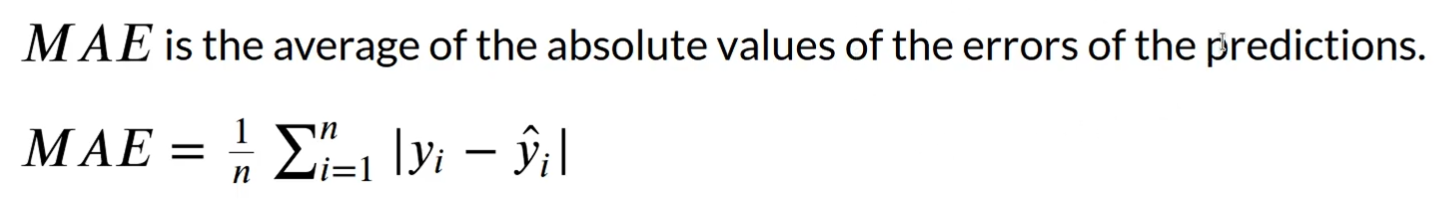

Referensi: https://en.wikipedia.org/wiki/Mean_absolute_error

In [21]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

print(f'MAE: {MAE}')

Mae: 12.083333333333336


### **Mean Squared Error(MSE) atau Mean Squared Deviation(MSD)**

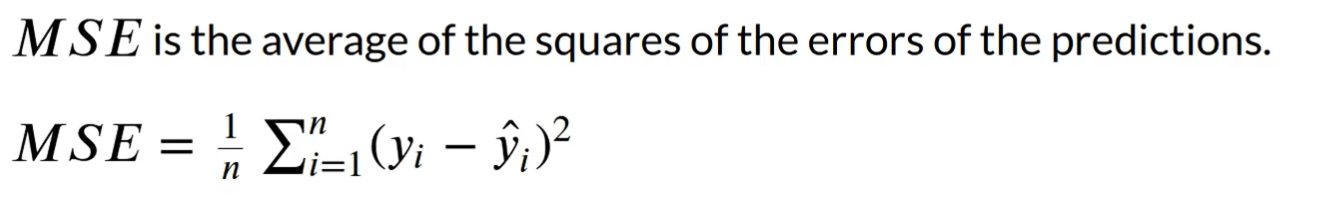

Referensi: https://en.wikipedia.org/wiki/Mean_squared_error

In [22]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print(f'MSE: {MSE}')

MSE: 227.63888888888897


### **Permasalahan Scalling pada Features**

In [23]:
from scipy.spatial.distance import euclidean

# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_new = np.array([[1640, 0]])

[euclidean(X_new[0], d) for d in X_train]

[np.float64(60.0), np.float64(40.01249804748511)]

In [24]:
# tinggi dalam meter
X_train = np.array([[1.7, 0], [1.6, 1]])
X_new = np.array([[1.64, 0]])

[euclidean(X_new[0], d) for d in X_train]

[0.06000000000000005, 1.0007996802557442]

### **Menerapkan Standar Scaler (Standar Score atau Z-Score)**

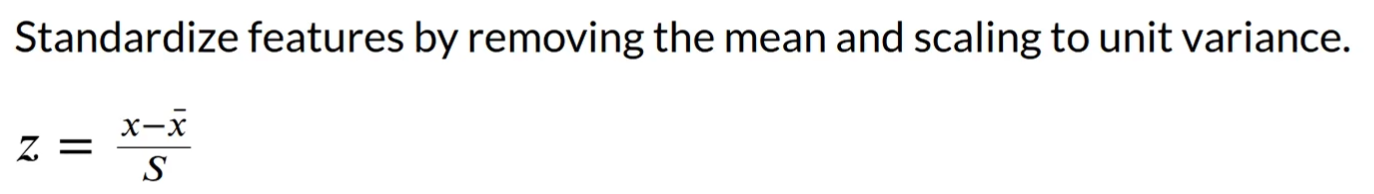

Referensi: https://en.wikipedia.org/wiki/Standard_score

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [27]:
# tinggi dalam milimeter
X_train = np.array([[1700, 0], [1600, 1]])
X_train_scaled = ss.fit_transform(X_train)
print(f'X_train_scaled:\n {X_train_scaled}\n')

X_new = np.array([[1640, 0]])
X_new_scaled = ss.transform(X_new)
print(f'X_new_scaled: {X_new_scaled}\n')

X_train_scaled:
 [[ 1. -1.]
 [-1.  1.]]

X_new_scaled: [[-0.2 -1. ]]

